# HW 5

Juan Vila


## Q1
### Q1-a




In [110]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
# load the data matrix X
d_jest = sio.loadmat('jesterdata.mat')
X = d_jest ['X']
# load known ratings y and true ratings truey
d_new = sio.loadmat ('newuser.mat')
y = d_new['y']
true_y = d_new['truey']
# total number of joke ratings should be m = 100 , n = 7200
m , n = X.shape
# train on ratings we know for the new user
train_indices = np.squeeze ( y != -99)
num_train = np.count_nonzero(train_indices)
# test on ratings we don ’t know
test_indices = np.logical_not(train_indices)
num_test = m - num_train
X_data = X [ train_indices , 0:20]
y_data = y [ train_indices ]
y_test = true_y [ test_indices ]


X_test = X[test_indices, 0:20]

# solve for weights

w = np.linalg.inv((X_data.T.dot(X_data))).dot(X_data.T.dot(y_data))

# compute predictions
y_hat_train = X_data.dot(w)
y_hat_test = X_test.dot(w)
# measure performance on training jokes

error_sq_train = (y_hat_train-y_data)**2
avgerr_train = error_sq_train.mean()

error_sq_test = (y_hat_test-y_test)**2
avgerr_test = error_sq_test.mean()




 Average l_2 error ( train ): 2.954026477001232
 Average l_2 ( test ): 28.75005010792656


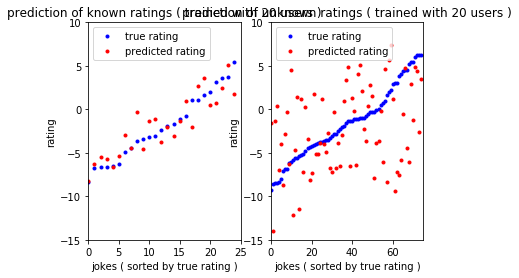

In [2]:

# display results
ax1 = plt.subplot (121)
sorted_indices = np.argsort( np.squeeze ( y_data ))
ax1.plot (
range ( num_train ) , y_data [ sorted_indices ] , 'b.',
range ( num_train ) , y_hat_train [ sorted_indices ] , 'r.'
)
ax1.set_title ('prediction of known ratings ( trained with 20 users )')
ax1.set_xlabel ('jokes ( sorted by true rating )')
ax1.set_ylabel ('rating')
ax1.legend ([ 'true rating', 'predicted rating'] , loc ='upper left')
ax1.axis ([0 , num_train , -15 , 10])
print (" Average l_2 error ( train ):", avgerr_train )
# measure performance on unrated jokes
# display results
ax2 = plt.subplot(122)
sorted_indices = np.argsort ( np.squeeze ( y_test ))
ax2.plot (
range ( num_test ) , y_test [ sorted_indices ] , 'b.',
range ( num_test ) , y_hat_test [ sorted_indices ] , 'r.'
)
ax2.set_title ('prediction of unknown ratings ( trained with 20 users )')
ax2.set_xlabel ('jokes ( sorted by true rating )')
ax2.set_ylabel ('rating')
ax2.legend ([ 'true rating' , 'predicted rating'] , loc ='upper left')
ax2.axis ([0 , num_test , -15 , 10])
print (" Average l_2 ( test ):", avgerr_test )
plt.show ()




### Q1 b

As we know if we use the full database the we have thatr n>p, this imply that we cannot invert the $X^TX$. One option for doing this is use the SVD solution of OLS to get the best of wheight vectors of the many that they are as the solution is undeterminated.

In [3]:
X_data_full = X [ train_indices]
X_test_full = X[test_indices]
w_q1_b1= np.linalg.inv((X_data_full.T.dot(X_data_full))).dot(X_data_full.T.dot(y_data))
# compute predictions
y_hat_train_q1b1 = X_data_full.dot(w_q1_b1)
y_hat_test_q1b1 = X_test_full.dot(w_q1_b1)
# measure performance on training jokes

error_sq_train_q1b1 = (y_hat_train_q1b1-y_data)**2
avgerr_train_q1b1 = error_sq_train_q1b1.mean()

error_sq_test_q1b1 = (y_hat_test_q1b1-y_test)**2
avgerr_test_q1b1 = error_sq_test_q1b1.mean()


avgerr_train_q1b1,avgerr_test_q1b1

(2424376.182711518, 37630336271.99922)

We can see that the error are big, this is because the matrix is not inverted properly

In [4]:
def truncated_svd(y,X,dims):
    U,Sig,VT = np.linalg.svd(X)
    n,p = X.shape
    S_inv = np.zeros((p,n))
    for i in range(p):
        if i<dims:
            S_inv[i][i]= 1/Sig[i]
        #else:
         #   continue
    w = VT.T[:,:dims].dot(S_inv[:dims,:dims]).dot(U.T[:dims,:]).dot(y)
    return w
w_q1_b2=truncated_svd(y_data,X_data,20)



# compute predictions
y_hat_train_q1b2 = X_data.dot(w_q1_b2)
y_hat_test_q1b2 = X_test.dot(w_q1_b2)
# measure performance on training jokes

error_sq_train_q1b2 = (y_hat_train_q1b2-y_data)**2
avgerr_train_q1b2 = error_sq_train_q1b2.mean()

error_sq_test_q1b2 = (y_hat_test_q1b2-y_test)**2
avgerr_test_q1b2 = error_sq_test_q1b2.mean()


avgerr_train_q1b2,avgerr_test_q1b2


(2.954026477001232, 28.750050107926405)

**Comments:** have the same result as previous part.

### Q1 c

One other way to do that i try to find the users that have the two more close values in the jokes scoring to the new users and compare the average squared error of difference between them. As we select the smallers ones we run OLS of y into the this two users. Then, we compare to the other two.

In [5]:
X_data_1c = X [ train_indices ]
error= 9999999
pos1 = -1
#first place
for i in range(X_data_1c.shape[1]):
    sqerror1 = (X_data_1c[:,i]-y_data[:,0])**2
    if sqerror1.mean()<error:
        pos1 = i
        error = sqerror1.mean()
#Second place
error= 9999999
pos2 = -1
for i in range(X_data_1c.shape[1]):
    sqerror2 = (X_data_1c[:,i]-y_data[:,0])**2
    if sqerror2.mean()<error and i != pos1:
        pos2 = i
        error = sqerror2.mean()
pos1, pos2

(588, 1971)

In [6]:
X_data_subset = X_data_1c[:,(pos1,pos2)]

In [7]:
w = np.linalg.inv((X_data_subset.T.dot(X_data_subset))).dot(X_data_subset.T.dot(y_data))
# we use the full dataset and compare all the jokes
predict_y = X[:,(pos1,pos2)].dot(w)
error_sq = (predict_y - true_y)**2
error_sq.mean()

15.23052665735736

This method was better than the one implemented in the 1a.

### Q1 d

Text(0.5, 1.0, 'Acu')

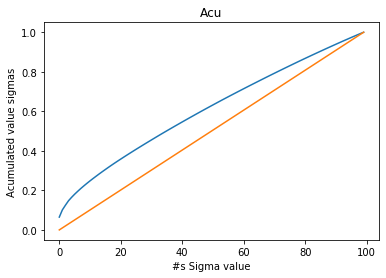

In [47]:
svd_1e = np.linalg.svd(X, full_matrices=False)
svd_1e[1]
acum = [svd_1e[1][0]]
for i in range(1,len(svd_1e[1])):
    t=acum[i-1]+svd_1e[1][i]
    acum.append(t)
acum = np.array(acum)/svd_1e[1].sum()
plt.plot(acum)
plt.plot(np.linspace(0,1,100))
plt.xlabel('#'"s"' Sigma value')
plt.ylabel('Acumulated value sigmas')
plt.title('Acu')

In [9]:
svd_1e[1]

array([2420.05555211, 1363.15642617,  885.9886694 ,  840.1797781 ,
        645.44375278,  593.58018653,  549.00372048,  528.80554415,
        496.40425645,  480.46954457,  465.57579395,  446.92294947,
        438.54143971,  432.90895092,  419.98759721,  412.44573515,
        409.6218473 ,  400.13217491,  393.54745993,  384.98421051,
        379.4131075 ,  376.85926081,  372.72379383,  367.91954294,
        365.98139495,  363.14148792,  359.03070248,  357.47565135,
        354.5775388 ,  351.34862466,  350.94615488,  349.69966405,
        347.90769091,  345.5718362 ,  341.25576497,  338.74938866,
        337.20573411,  335.18370743,  333.79236022,  331.21813845,
        330.64364318,  328.55893967,  327.76387852,  325.86316437,
        324.28352215,  323.52513414,  321.94402956,  319.54785407,
        317.51300349,  316.10590731,  314.42448411,  313.02928634,
        312.02288906,  310.72820272,  307.16970569,  306.5778765 ,
        303.73699134,  302.50453835,  301.51693448,  300.67766

**Comment:** We can see that in overall the first sigma values are really high, after the eighth one values are much more stable meaningn that probably the higher values are the one that explain more of the preferences in the ranking of the jokes.

### Q1 e

In [115]:
X_cent = X-np.mean(X, axis=1).reshape(100,1)
U1c, s1c , VT1c = np.linalg.svd(X_cent, full_matrices=False)
n,p = X_cent.shape 
Sc = np.zeros((n,p))
Sc[:X.shape[1], :X.shape[0]] = np.diag(s1c)
principal_components_1e = U1c.dot(Sc)

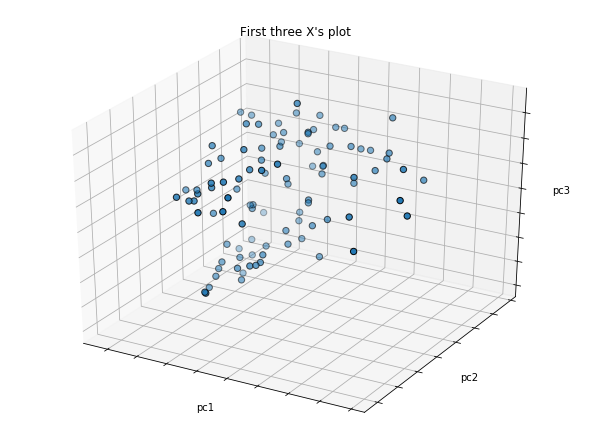

In [116]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(principal_components_1e[:, 0], principal_components_1e[:, 1], principal_components_1e[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three X's plot")
ax.set_xlabel("pc1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("pc2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("pc3")
ax.w_zaxis.set_ticklabels([])




plt.show()

### Q1 f

In [12]:
def svd_1d(A, epsilon=1e-10):
    ''' The one-dimensional SVD '''
 
    n, m = A.shape
    x = np.random.rand(A.shape[1])
    V_t_1 = None
    Vt = x
    B = np.dot(A.T, A)
 
    iterations = 0
    while True:
        iterations += 1
        V_t_1 = Vt
        Vt = np.dot(B, V_t_1)
        Vt = Vt / np.linalg.norm(Vt)
 
        if abs(np.dot(Vt, V_t_1)) > 1 - epsilon:
            print("converged in {} iterations!".format(iterations))
            return Vt
v = svd_1d(X)
u_unnormalized = np.dot(X, v)
sigma = np.linalg.norm(u_unnormalized) 
u = u_unnormalized / sigma

sigma

converged in 1 iterations!


2300.030011634693

In [13]:
svd_1f = np.linalg.svd(X, full_matrices=False)
svd_1f[1][0]

2420.055552108528

we can see that the values of sigma are quite close, nevertheless the other elements are not.

### Q1 g

Since the matrix X is spd, we could argue that any probability vector>0 would generate a convergency in the system. But we know that any vector that would be of the estructure (1,1,0) could not always converge because if the initializer vector is orthogonal to the matrix A this will not converge. In the other hand, any vector with we initialize with values greater that zero will converge.

## Q2

In [14]:
import numpy as np
import matplotlib . pyplot as plt
import scipy . io as sio
import sys
import random
random.seed(None)
np.random.seed(None)
d = sio.loadmat('face_emotion_data.mat')
X_q2 = d ['X']
y_q2 = d ['y']
n,p = np.shape(X_q2)
# error rate for regularized least squares
error_RLS = np.zeros ((8 , 7))
# error rate for truncated SVD
error_SVD = np.zeros ((8 , 7))
# SVD parameters to test
k_vals = np.arange (9) + 1
param_err_SVD = np.zeros(len( k_vals ))
# RLS parameters to test
lambda_vals = np.array ([0 , 0.5 , 1 , 2 , 4 , 8 , 16])
param_err_RLS = np.zeros (len( lambda_vals ))


In [15]:
def beta_est(Y,x,cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    return np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),\
                  np.dot(np.transpose(X),Y))

def polynomial(x,d):
    rv = x.copy()
    if d>1:
        for i in range(2,d+1):
           rv =  np.column_stack((rv,x ** i))
    else:
        return x
    
    return rv

def proyection(Y,x, cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    y_hat = np.dot(X,beta_est(Y,x,cons))
    return y_hat

def cross_val(y,X,n):
    data = np.column_stack((y,X))
    np.random.shuffle(data)
    data_cv = np.split(data,n)
    rv =[]
    for i in range(n):
        temp=data_cv.copy()
        test_set = temp.pop(i)
        y_test, x_test =  test_set[:,[0]], test_set[:,1:]
        train_set = np.concatenate(temp,axis=0)
        y_train, x_train = train_set[:,[0]], train_set[:,1:]
        w = beta_est(y_train, x_train)
        x_test = np.column_stack((x_test,np.ones([len(x_test),1])))
        y_hat = np.dot(x_test,w)
        count = 0
        y_label_assig = np.where(y_hat>0,1,-1)
        for i,j in enumerate(y_test):
            if y_label_assig[i]==1 and y_test[i]==-1 or\
            y_label_assig[i]==-1 and y_test[i]==+1:
                count+=1
        rv.append(count/16)
    rv=np.array(rv)
    
    return rv.mean()

In [16]:
def predict_and_error(w,x,y_comp,cons=False):
        if cons:
            X = np.column_stack((x,np.ones([len(x),1])))
        else:
            X=x.copy()
        y_hat = np.dot(X,w)
        count = 0
        y_label_assig = np.where(y_hat>0,1,-1)
        for i,j in enumerate(y_comp):
            if y_label_assig[i]==1 and y_comp[i]==-1 or\
            y_label_assig[i]==-1 and y_comp[i]==+1:
                count+=1
        rv = (count/len(y_comp))
        return rv


def error_for_k(y,X,k):
    X_trans =np.column_stack((truncated_svd_m(X,k),np.ones([len(X),1])))
    w=np.linalg.inv(X_trans.T.dot(X_trans)).dot(X_trans.T).dot(y)
    y_temp =X_trans.dot(w)
    y_hat_label = np.where(y_temp>0,1,-1)
    count =0 
    for j,v in enumerate(y):
        if y[j] == y_hat_label[j]:
            count+=1
    error =1- (count)/len(y)
    return error
    
def hold_out_iterr_svd(y,X,n):
    import itertools
    data = np.column_stack((y,X))
    np.random.shuffle(data)
    data_cv = np.split(data,n)
    rv = []
    index_cv = np.arange(n)
    for subset in itertools.combinations(index_cv, 6):
        test_holdouts_index = list(set(index_cv) - set(subset))
        train_holdouts_index = list(subset)
        
        train_data = []
        for i,d in enumerate(data_cv):
            for z in train_holdouts_index:
                if z == i:
                    train_data.append(data_cv[i])
        
        test_holdouts = []
        for i,d in enumerate(data_cv):
            for z in test_holdouts_index:
                if z == i:
                    test_holdouts.append(data_cv[i])
        
        train_set = np.concatenate(train_data,axis=0)
        y_train, x_train = train_set[:,[0]], train_set[:,1:]
        
        opt_k = 999999
        error = 999999     
        for k in k_vals:
            if error_for_k(y_train,x_train,k)<error:
                error = error
                opt_k = k
        y_test1, x_test1 = test_holdouts[0][:,[0]], test_holdouts[0][:,1:]
        y_test2, x_test2 = test_holdouts[1][:,[0]], test_holdouts[1][:,1:]  
        X_trans1 =np.column_stack((truncated_svd_m(x_test1,opt_k),np.ones([len(x_test1),1])))
        X_trans2 =np.column_stack((truncated_svd_m(x_test2,opt_k),np.ones([len(x_test2),1])))
        w_1 = beta_est(y_test1,X_trans1,False)
        w_2 = beta_est(y_test2,X_trans2,False)
        error1 = predict_and_error(w_1,truncated_svd_m( X_trans2, opt_k),y_test2,False)
        rv.append(error1)
        error2 = predict_and_error(w_2,truncated_svd_m( X_trans1, opt_k),y_test1,False)
        rv.append(error2)
    return np.array(rv) #.mean(), opt_k


def truncated_svd(y,X,dims):
    U,Sig,VT = np.linalg.svd(X)
    n,p = X.shape
    S_inv = np.zeros((p,n))
    for i in range(p):
        if i<dims:
            S_inv[i][i]= 1/Sig[i]
        #else:
         #   continue
    w = VT.T[:,:dims].dot(S_inv[:dims,:dims]).dot(U.T[:dims,:]).dot(y)
    return w


def truncated_svd_m(X,dims):
    U,Sig,VT = np.linalg.svd(X)
    n,p = X.shape
    S = np.zeros((n,p))
    S[:X.shape[1], :X.shape[1]] = np.diag(Sig)
    #for i in range(p):
        #if i<dims:
            #S[i][i]= Sig[i]
        #else:
         #   continue
    U_trunc = U[:,:dims]
    S_trunc = S[:dims,:dims]
    VT_trunc = VT[:dims,:]
    X_trans = U_trunc.dot(S_trunc.dot(VT_trunc))
    return X_trans




In [17]:
svd = np.linalg.svd(X_q2)
svd[1]

array([25.54838834, 14.91187496, 11.29259558,  7.87779324,  6.43735809,
        4.76747294,  4.15144124,  1.92101507,  1.49678197])

In [18]:

def error_for_k(y,X,k):
    X_trans =np.column_stack((truncated_svd_m(X,k),np.ones([len(X),1])))
    w=np.linalg.inv(X_trans.T.dot(X_trans)).dot(X_trans.T).dot(y)
    y_temp =X_trans.dot(w)
    y_hat_label = np.where(y_temp>0,1,-1)
    count =0 
    for j,v in enumerate(y):
        if y[j] == y_hat_label[j]:
            count+=1
    error =1- (count)/len(y)
    return error

In [19]:
truncated_svd(y_q2,np.column_stack((X_q2,np.ones([len(X_q2),1]))),10)

array([[ 0.94366942],
       [ 0.21373778],
       [ 0.26641775],
       [-0.39221373],
       [-0.00538552],
       [-0.01764687],
       [-0.16632809],
       [-0.0822838 ],
       [-0.16644364],
       [ 0.078125  ]])

### Q2a

In [20]:
svd_error = hold_out_iterr_svd(y_q2,X_q2,8)
np.array(svd_error).mean()



0.17075892857142858

In [21]:
rv = []
for i in range(1,X_q2.shape[1]+1):
    X_trans =np.column_stack((truncated_svd_m(X_q2,i),np.ones([len(X_q2),1])))
    w=np.linalg.inv(X_trans.T.dot(X_trans)).dot(X_trans.T).dot(y_q2)
    y_temp =X_trans.dot(w)
    y_hat_label = np.where(y_temp>0,1,-1)
    count =0 
    for j,v in enumerate(y_q2):
        if y_q2[j] == y_hat_label[j]:
            count+=1
    error =1- (count)/len(y_q2)
    rv.append(error)
np.array(rv).mean()

0.09027777777777778

### Q2b

We know that the formula for LeastSquares with ridge penalizer is:
\begin{align}
\ w & = (X^TX+I\lambda)^{-1}X^TY \\
\end{align}
If we replace for $X=U\Sigma V^{-1}$ we have the following result for $X^TX =𝑉\Sigma𝑈^{T}𝑈\Sigma𝑉^{T}=𝑉\Sigma^{2}𝑉^{T}$, the replacing this fact into the previous equation we have:

\begin{align}
\ w & = (𝑉 \Sigma^{2}𝑉^{T}+I\lambda)^{-1}X^TY \\
\ w & = (𝑉 \Sigma^{2}𝑉^{T}+\lambda VV^{T})^{-1}𝑉\Sigma𝑈^{T}Y \\
\ w & = (𝑉 (\Sigma^{2}+\lambda)V^{T})^{-1}𝑉\Sigma𝑈^{T}Y \\
\end{align}
Since V is a orthonormal matrix we can move out of the inverse operation

\begin{align}
\ w & = 𝑉 (\Sigma^{2}+\lambda)^{-1}V^{T}𝑉\Sigma𝑈^{T}Y \\
\ w & = 𝑉 (\Sigma^{2}+\lambda)^{-1}\Sigma𝑈^{T}Y \\
\end{align}
Finally, we know that $(\Sigma^{2}+\lambda)^{-1}\Sigma$ for every element in the diagonal is  $\frac{\sigma_i}{\sigma_i^{2}+\lambda}$

In [25]:
lambda_ridge = np.zeros((9,9))
np.fill_diagonal(lambda_ridge, .2)
w_ols = np.linalg.inv(X_q2.T.dot(X_q2)).dot(X_q2.T.dot(y_q2))
w_ridge = np.linalg.inv(X_q2.T.dot(X_q2)+lambda_ridge).dot(X_q2.T.dot(y_q2))




def svd_ridge(y,X,lambda_r):
    U,Sig,VT = np.linalg.svd(X)
    n,p = X.shape
    S_inv = np.zeros((p,n))
    S = np.zeros((n,p))
    for i in range(p):
        S_inv[i][i]= Sig[i]/(Sig[i]**2 + lambda_r)
    w = VT.T.dot(S_inv).dot(U.T).dot(y)
    return w


def hold_out_iterr_ridge(y,X,n):
    import itertools
    from collections import deque
    data = np.column_stack((y,X))
    np.random.shuffle(data)
    data_cv = np.split(data,n)
    rv = []
    index_cv = np.arange(n)
    for subset in itertools.combinations(index_cv, 6):
        test_holdouts_index = list(set(index_cv) - set(subset))
        train_holdouts_index = list(subset)
        
        train_data = []
        for i,d in enumerate(data_cv):
            for z in train_holdouts_index:
                if z == i:
                    train_data.append(data_cv[i])
        
        test_holdouts = []
        for i,d in enumerate(data_cv):
            for z in test_holdouts_index:
                if z == i:
                    test_holdouts.append(data_cv[i])
        
        train_set = np.concatenate(train_data,axis=0)
        y_train, x_train = train_set[:,[0]], train_set[:,1:]
        
        opt_r = 999999
        error = 999999
        
        for r in lambda_vals:
            w_hat = svd_ridge(y_train, x_train, r)
            y_hat_k = x_train.dot( w_hat)
            count = 0
            y_label_assig = np.where(y_hat_k>0,1,-1)
            for i,j in enumerate(y_train):
                if y_label_assig[i]==1 and y_train[i]==-1 or \
                y_label_assig[i]==-1 and y_train[i]==+1:
                    count+=1
            if count/len(y_train)<error:
                error = count/len(y_train)
                opt_r = r
        y_test1, x_test1 = test_holdouts[0][:,[0]], test_holdouts[0][:,1:]
        y_test2, x_test2 = test_holdouts[1][:,[0]], test_holdouts[1][:,1:]  
        w_1 = svd_ridge(y_test1, x_test1, opt_r)
        w_2 = svd_ridge(y_test2, x_test2, opt_r)
        error1 = predict_and_error(w_1,x_test2,y_test2)
        rv.append(error1)
        error2 = predict_and_error(w_2,x_test1,y_test1)
        rv.append(error2)
    return np.array(rv).mean()






In [23]:
svd_ridge = hold_out_iterr_ridge(y_q2,X_q2,8)
svd_ridge

0.09821428571428571

### Q2 C

In [138]:
import random
def rand_weight(n):

    wh=[]
    for i in range(n):
        wh.append(random.randrange(0,1000)/1000)
    wh=np.array(wh)
    wh = wh/wh.sum()
    return wh
def rand_col_select(z, X):
    n,p = X.shape
    cols=[]
    for i in range(z):
        num = random.randint(0,p-1)
        cols.append(num) 
    wh =  rand_weight(z)
    rand_vars = X[:,cols]
    rv = rand_vars.dot(wh.T)
    return rv


rand_var = np.concatenate((rand_col_select(3,X_q2),\
                           rand_col_select(3,X_q2),\
                           rand_col_select(3,X_q2))).reshape(128,3)
X_q2c= np.concatenate((X_q2, rand_var),axis=1)
#X_q2c.shape

svd_ridge_2c = hold_out_iterr_ridge(y_q2,X_q2c,8)
svd_truncated_2c = hold_out_iterr_ridge(y_q2,X_q2c,8)

In [27]:
svd_ridge_2c

0.15290178571428573

In [28]:
svd_truncated_2c.mean()

0.12723214285714285

## Q3

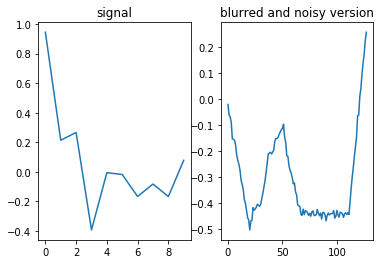

In [29]:


import numpy as np
import matplotlib.pyplot as plt

## deblurring
def deblurring(n_1,k_1,sg):
    n = n_1
    k = k_1
    sigma = sg

    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()


    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))
    return y, X

    #n = 500
    #k = 30
    #sigma = 0.01
y_q3, X_q3 = deblurring(500,30,.01)

# plot
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('signal')
ax1.plot(w)
ax2.set_title('blurred and noisy version')
ax2.plot(y_q3[0:n])

plt.show()










### Q3 a

Using the function developed for part 2 we have the follwing.

In [30]:

##OLS
y_q3, X_q3 = deblurring(500,30,.01)
w_ols = beta_est(y_q3,X_q3,cons=True)
predict_ols = proyection(y_q3,X_q3, cons=True)
error_sq=(predict_ols-y_q3)**2
error_sq.mean()
## Ridge Reg
def svd_ridge(y,X,lambda_r):
    U,Sig,VT = np.linalg.svd(X)
    n,p = X.shape
    S_inv = np.zeros((p,n))
    S = np.zeros((n,p))
    for i in range(p):
        S_inv[i][i]= Sig[i]/(Sig[i]**2 + lambda_r)
    w = VT.T.dot(S_inv).dot(U.T).dot(y)
    return w
## Truncated OLS 
def truncated_svd(y,X,dims):
    U,Sig,VT = np.linalg.svd(X)
    n,p = X.shape
    S_inv = np.zeros((p,n))
    for i in range(p):
        if i<dims:
            S_inv[i][i]= 1/Sig[i]
        #else:
         #   continue
    w = VT.T[:,:dims].dot(S_inv[:dims,:dims]).dot(U.T[:dims,:]).dot(y)
    return w





def predict_and_error_sq(w,x,y_comp):
    y_hat = np.dot(x,w)
    rv = (y_hat -  y_comp)**2
    return rv.mean()



### Q3 b


In [31]:
k_param = [5,10,20,25,30,40,50,60,70,100]
#k_param = [5]
sg_param = [.01,.05,.5,1,2,4,8,10,20,30,50]

errors_ols=[]
for k in k_param:
    for s in sg_param:
        y , X  = deblurring(500,k,s)
        predict_ols = proyection(y,X, cons=False)
        error_sq=(predict_ols-y)**2
        errors_ols.append(error_sq.mean())
errors_ols = np.array(errors_ols).reshape(10,11)

#### OLS

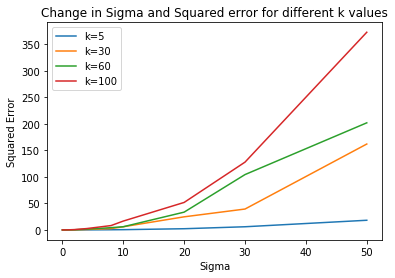

In [32]:
plt.plot(sg_param,errors_ols[0,:],label='k=5')
plt.plot(sg_param,errors_ols[4,:],label='k=30')
plt.plot(sg_param,errors_ols[6,:],label='k=60')
plt.plot(sg_param,errors_ols[9,:],label='k=100')
plt.title('Change in Sigma and Squared error for different k values')
plt.ylabel("Squared Error")
plt.xlabel("Sigma")
plt.legend()

***Comment***: We can see that as Sigma and K increase the squared error also increase.

#### SVD

In [33]:
k_param = [5,10,20,25,30,40,50,60,70,100]
#k_param = [5]
sg_param = [.01,.05,.5,1,2,4,8,10,20,30,50]
dims = [20, 50, 100, 200, 300, 500]
errors_svm=[]
for d in dims:
    rv_errors=[]
    for k in k_param:
        for s in sg_param:
            y , X  = deblurring(500,k,s)
            w = truncated_svd(y,X,d)
            error_sq=predict_and_error_sq(w,X,y)
            rv_errors.append(error_sq)
    errors_svm.append(rv_errors)


In [34]:
mean_errors_svm = []
error_matrix_svm = []
for i in range(6):
    mean_errors_svm.append(np.array(errors_svm[i]).mean())
    error_matrix_svm.append(np.array(errors_svm[i]).reshape(10,11))


In [35]:
mean_errors_svm

[355.1434840428427,
 326.4021297691112,
 295.53446270208906,
 235.54853878471332,
 161.4131999994252,
 23.571404123966193]

We can see that as we incorporate variables or we truncate the SVM with more variables the Squared Error Decrease for every K and Sig. This can be seen in the following graphs.

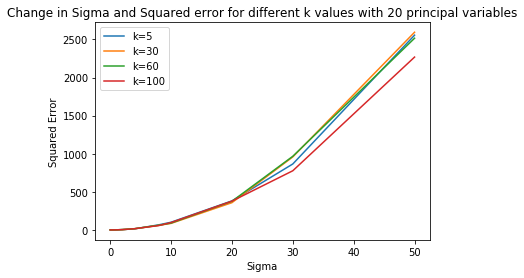

In [137]:
#truncated in 20 varibales
plt.plot(sg_param,error_matrix_svm[0][0,:],label='k=5')
plt.plot(sg_param,error_matrix_svm[0][4,:],label='k=30')
plt.plot(sg_param,error_matrix_svm[0][6,:],label='k=60')
plt.plot(sg_param,error_matrix_svm[0][9,:],label='k=100')
plt.title('Change in Sigma and Squared error for \
different k values with 20 principal variables')
plt.ylabel("Squared Error")
plt.xlabel("Sigma")
plt.legend()

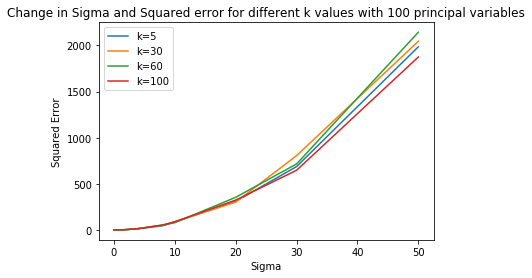

In [37]:
#Truncated in 100 variables
plt.plot(sg_param,error_matrix_svm[2][0,:],label='k=5')
plt.plot(sg_param,error_matrix_svm[2][4,:],label='k=30')
plt.plot(sg_param,error_matrix_svm[2][6,:],label='k=60')
plt.plot(sg_param,error_matrix_svm[2][9,:],label='k=100')
plt.title('Change in Sigma and Squared error for different k values with 100 principal variables')
plt.ylabel("Squared Error")
plt.xlabel("Sigma")
plt.legend()

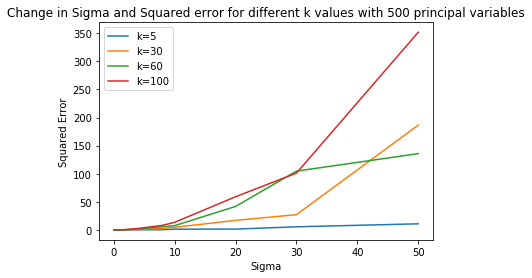

In [38]:
#truncated in 500 variables
plt.plot(sg_param,error_matrix_svm[5][0,:],label='k=5')
plt.plot(sg_param,error_matrix_svm[5][4,:],label='k=30')
plt.plot(sg_param,error_matrix_svm[5][6,:],label='k=60')
plt.plot(sg_param,error_matrix_svm[5][9,:],label='k=100')
plt.title('Change in Sigma and Squared error for different k values with 500 principal variables')
plt.ylabel("Squared Error")
plt.xlabel("Sigma")
plt.legend()

**Ridge**

In [39]:
k_param = [5,10,20,25,30,40,50,60,70,100]
#k_param = [5]
sg_param = [.01,.05,.5,1,2,4,8,10,20,30,50]
lambda_r = [.5, 1, 2, 4, 8,16]
errors_ridge=[]
for r in lambda_r:
    rv_errors=[]
    for k in k_param:
        for s in sg_param:
            y , X  = deblurring(500,k,s)
            w = svd_ridge(y,X,r)
            error_sq=predict_and_error_sq(w,X,y)
            rv_errors.append(error_sq)
    errors_ridge.append(rv_errors)


In [40]:
mean_errors_ridge = []
error_matrix_ridge = []
for i in range(6):
    mean_errors_ridge.append(np.array(errors_ridge[i]).mean())
    error_matrix_ridge.append(np.array(errors_ridge[i]).reshape(10,11))


<BarContainer object of 6 artists>

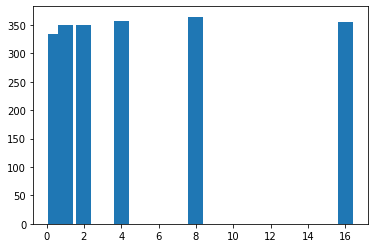

In [41]:
plt.bar(lambda_r,mean_errors_ridge)

In [42]:
mean_errors_ridge

[334.92421098982715,
 349.36642978058654,
 350.00029691266036,
 357.19775982219636,
 364.4885697370022,
 354.6958443758755]

**Comment:** We can see that the error on average tend to increase as lambda increase, this is because  as we increase in the factor lambda the bias increase. Nevertheless, in simulation realized we can see that for values around one it find a minimal error.

## Q4

### A

Since to get the eigen value of any matrix we have to solve the following equation $Av=\lambda v$, we can look for the for the value the eigen values of $A^T$, then we get:
\begin{align}
A^Tv=\lambda v
\end{align}
Since, we know that the columns of A add up to one, then in the case of $A^T$ the rows will add up to one, then could try to find the eigenvalues for the vector $v=1$, then we have:
\begin{align}
A^T1=\lambda
\end{align}
Then we can see that 1 must be a vector of $A^T$, then as A and $A^T$ have the same eigenvalues, then 1 also is eigenvalue of A.


### B

We star writing up the G matrix in $R^2$, for that we have:

\begin{align}
G=\alpha A +(1-\alpha) u 1^T
\end{align}

If we replace $A=\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
\end{bmatrix}$ and $U=\begin{bmatrix}
u_{1} \\
u_{2} \\
\end{bmatrix}$ we have the following equation:


\begin{align}
G=\alpha\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
\end{bmatrix} +(1-\alpha)\begin{bmatrix}
u_{1} \\
u_{2} \\
\end{bmatrix} 1^T
\end{align}

If we multiply everything and add up both matrices, we have:

\begin{align}
\alpha(a_{11} + a_{21})+ (1-\alpha)(u_{1}+u_{2})=1 \\
\alpha(a_{21} + a_{22})+ (1-\alpha)(u_{1}+u_{2})=1 \\
\end{align}

Now, we use the fact that the columns of A have to add up to one, then:
\begin{align}
(1-\alpha)(u_{1}+u_{2})=1-\alpha  \\
(1-\alpha)(u_{1}+u_{2})=1-\alpha \\
\end{align}

Finally we assume that $u_1 = u_2$ then:
\begin{align}
(2u)=1  \\
u=\frac{1}{2}  \\
\end{align}
Now if we replace in the original equation we have:

\begin{align}
G=\alpha\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
\end{bmatrix} +(1-\alpha)\begin{bmatrix}
\frac{1}{2} \\
\frac{1}{2} \\
\end{bmatrix} 1^T
\end{align}

\begin{align}
G=\alpha\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
\end{bmatrix} +(1-\alpha)\frac{1}{2}\begin{bmatrix}
1 \\
1 \\
\end{bmatrix} 1^T
\end{align}

Then as we assume two dimensions we can extrapolate this result for n dimensions, then we get:

\begin{align}
G=\alpha A +(1-\alpha)\frac{1}{n} 1 1^T
\end{align}

Which is the same result as the google matrix.

### C

Now we know that the M matrix is:
\begin{align}
M=\begin{bmatrix}
1 & \cdots & \cdots  & 1 \\
0 & 0  &\cdots & 0\\
\vdots & \vdots &\ddots & \vdots\\
0 & 0  &\cdots & 0\\
\end{bmatrix}
\end{align}


Now we know that the A matrix is:
\begin{align}
A=\begin{bmatrix}
1 & \cdots & \cdots  & 1 \\
0 & 0  &\cdots & 0\\
\vdots & \vdots &\ddots & \vdots\\
0 & 0  &\cdots & 0\\
\end{bmatrix}
\end{align}

Now we know that the G matrix is:
\begin{align}
G=\alpha\begin{bmatrix}
1 & \cdots & \cdots  & 1 \\
0 & 0  &\cdots & 0\\
\vdots & \vdots &\ddots & \vdots\\
0 & 0  &\cdots & 0\\
\end{bmatrix} + (1-\alpha)\begin{bmatrix}
\frac{1}{n} & \cdots & \cdots  & \frac{1}{n} \\
\vdots & \ddots  & & \vdots\\
\vdots &  &\ddots & \vdots\\
\frac{1}{n} & \cdots  &\cdots & \frac{1}{n}\\
\end{bmatrix}
\end{align}


\begin{align}
G=
\begin{bmatrix}
\alpha+\frac{1-\alpha}{n} & \cdots & \cdots  & \alpha+\frac{1-\alpha}{n} \\
\frac{(1-\alpha)}{n} &  \frac{(1-\alpha)}{n} &\cdots & \frac{(1-\alpha)}{n}\\
\vdots & \vdots &\ddots & \vdots\\
\frac{(1-\alpha)}{n} & \frac{(1-\alpha)}{n}  &\cdots & \frac{(1-\alpha)}{n}\\
\end{bmatrix}
\end{align}


Now for the Page rank, we are going to start for the easy one that is only for the person that not are in facebook and we are going to initialize page rank $\pi^{(0)}=\frac{1}{n}$, then for the non facebook pages it's look like:

\begin{align}
\pi^{(1)}=\begin{bmatrix}
\frac{(1-\alpha)}{n}  &\cdots & \frac{(1-\alpha)}{n}\\
\vdots &\ddots & \vdots \\
\frac{(1-\alpha)}{n}  &\cdots & \frac{(1-\alpha)}{n}\\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{n} \\
\vdots \\
\frac{1}{n}\\
\end{bmatrix}
\end{align}
\begin{align}
\pi^{(1)}=\begin{bmatrix}
\frac{(1-\alpha)}{n} \\
\vdots \\
\frac{(1-\alpha)}{n} \\
\end{bmatrix}
\end{align}

Then $\pi^{(2)}$:
\begin{align}
\pi^{(2)}=\begin{bmatrix}
\frac{(1-\alpha)^2}{n^2} \\
\vdots \\
\frac{(1-\alpha)^2}{n^2} \\
\end{bmatrix}
\end{align}

Then let's assume that the convergency is in the j step, then the value of the pagerank is:

\begin{align}
\pi^{(j)}=\begin{bmatrix}
\frac{(1-\alpha)^j}{n^j} \\
\vdots \\
\frac{(1-\alpha)^j}{n^j} \\
\end{bmatrix}
\end{align}

Now for the case of the complete matrix we get:



\begin{align}
\pi^{(1)}=
\begin{bmatrix}
\alpha+\frac{1-\alpha}{n} & \cdots & \cdots  & \alpha+\frac{1-\alpha}{n} \\
\frac{(1-\alpha)}{n} &  \frac{(1-\alpha)}{n} &\cdots & \frac{(1-\alpha)}{n}\\
\vdots & \vdots &\ddots & \vdots\\
\frac{(1-\alpha)}{n} & \frac{(1-\alpha)}{n}  &\cdots & \frac{(1-\alpha)}{n}\\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{n} \\
\vdots \\
\vdots \\
\frac{1}{n}\\
\end{bmatrix}
\end{align}





## Q5

In [43]:
d = sio.loadmat('mnist.mat')
train_data_q5 = d['train_data']
train_target_q5 = d['train_target']
test_data_q5 = d['test_data']
test_target_q5 = d['test_target']


### Q5 a

Text(0.5, 0, 'number of principle components')

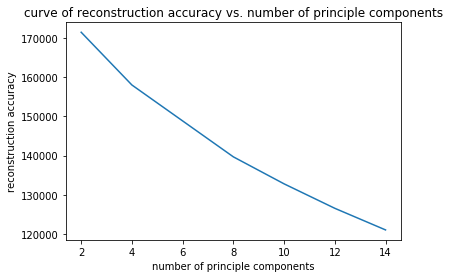

In [77]:
train_reduction =  [2,4,8,10,12,14]
svd_train = np.linalg.svd(train_data_q5, full_matrices=False)
sum_sigma = svd_train[1].sum()
train_reduction_vals = []
for i in train_reduction:
    train_reduction_vals.append(svd_train[1][i:,].sum())
plt.plot(train_reduction,train_reduction_vals)
plt.title('curve of reconstruction accuracy vs. number of principle components')
plt.ylabel('reconstruction accuracy')
plt.xlabel('number of principle components')


### Q5 b

In [50]:
def dimensionality_red(x,dims):
    svd = np.linalg.svd(x, full_matrices=False)
    VT = svd[2]
    VT.T[:,(0,1)]
    X_transform_approach = x.dot(VT.T[:,(list(range(0, dims)))])
    return X_transform_approach



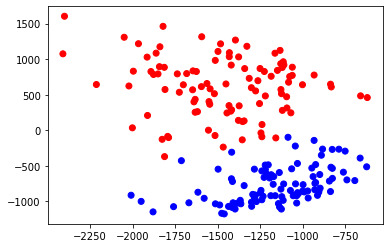

In [51]:
X_tr=dimensionality_red(train_data_q5,2)
y=np.where(train_target_q5>0,'b','r')
plt.scatter(X_tr[:,0],X_tr[:,1],c=y[0, :])


### Q5c

In [52]:
X_full =  np.concatenate((train_data_q5,test_data_q5),axis=0)
X_full.shape
#y_full =  np.concatenate((train_target_q5,test_target_q5),axis=0).T
X_red = dimensionality_red(X_full,2)
#X_red.shape
X_red_train = X_red[list(range(200)),:]
X_red_test = X_red[list(range(200,400)),:]
def error_train_test(X_train,X_test,y_train,y_test):
    w= beta_est(y_train,X_train, True)
    y_hat =  np.column_stack((X_test,np.ones([len(X_test),1]))).dot(w) 
    y_hat_assig = np.where(y_hat>0,1,-1)
    count =0 
    for j,v in enumerate(y_test):
        if y_test[j] == y_hat_assig[j]:
            count+=1
    test_error =1- (count)/len(y_test)
    return test_error

**Error in cross validation**

In [53]:
error_train_test(X_red_train,X_red_test,train_target_q5.T,test_target_q5.T)

0.020000000000000018

**Error in using only test data**

In [54]:
 error_train_test(X_red_test,X_red_test,test_target_q5.T,test_target_q5.T)

0.020000000000000018

**Error using only train data**

In [55]:
error_train_test(X_red_train,X_red_train,train_target_q5.T,train_target_q5.T)

0.025000000000000022

### q5 d

For this part i am goint to use the cross validation part

In [56]:
w= beta_est(train_target_q5.T,X_red_train, True)
y_hat_q5_d = np.column_stack((X_red_test,np.ones([len(X_red_test),1]))).dot(w)
test_p = X_red_test[:,0]*w[0]+X_red_test[:,1]*w[1] + w[2]
xx = np.linspace(X_red_test[:,0].min(),X_red_test[:,0].max(),200)
yy = np.linspace(y_hat_q5_d.min(),y_hat_q5_d.max(),200)
bound = -xx*w[0]/w[1]-w[2]/w[1]


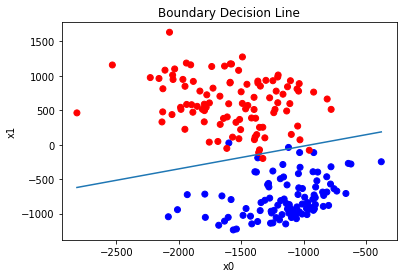

In [57]:
y_test_col=np.where(test_target_q5>0,'b','r')
plt.scatter(X_red_test[:,0],X_red_test[:,1],c=y_test_col[0, :])
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Boundary Decision Line')
plt.plot(xx,bound)

## Q6

In [58]:
d_q6 = sio.loadmat('pca_3d.mat')
X_q6 = d_q6['point'] 
y_q6 = d_q6['target'] 

### q6 a

In [126]:
X_cent = X_q6-np.mean(X_q6, axis=0)
U6c, s6c , VT6c = np.linalg.svd(X_cent, full_matrices=False)
U6, s6 , VT6 = np.linalg.svd(X_q6, full_matrices=False)
n,p = X_cent.shape 
Sc = np.zeros((p,p))
Sc[:X.shape[1], :X.shape[1]] = np.diag(s6c)
principal_components = U6c.dot(Sc)
C = VT6c.T.dot(Sc).dot(VT6c)

In [127]:
np.cov(X_cent.T)

array([[0.41954186, 0.18809701, 0.02370025],
       [0.18809701, 0.23950482, 0.45407119],
       [0.02370025, 0.45407119, 1.26858974]])

In [128]:
s6c**2/(n-1)

array([1.44809728e+00, 4.79539142e-01, 9.94391926e-33])

In [129]:
svd6 = np.linalg.svd( X_q6, full_matrices=False)
svd6[1]

array([1.69758947e+01, 9.78446413e+00, 2.08869377e-15])

**Comments** we can see that the third value of sigma is very close to zero and if we calculate the principal components we see thath the third column are very low vaues zero and very close to each other meaning that most of variance of the data is explained by the first and second component.

### q6 b

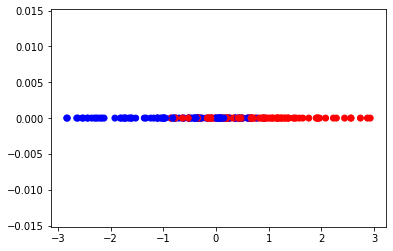

In [130]:
y_test_col=np.where(y_q6>0,'b','r')
transform1 = X_q6.dot(VT6.T[:,0])
transform1c = X_cent.dot(VT6c.T[:,0])
transform2 = X_q6.dot(VT6.T[:,(0,1)])
transform2c = X_cent.dot(VT6c.T[:,(0,1)])
p = np.linspace(0,0,200)
plt.scatter(transform1,p,c=y_test_col[0, :])

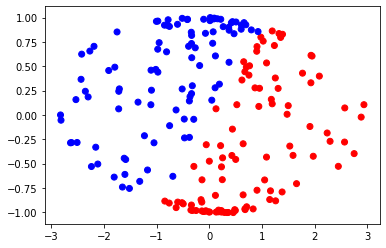

In [131]:
plt.scatter(transform2c[:,0],transform2[:,1],c=y_test_col[0, :])

### Q6 c

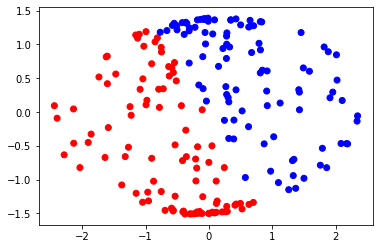

In [132]:
sigma = np.cov(X_cent.T)
evals, evecs = np.linalg.eigh(sigma)
z = np.diag(evals**(-1/2)).dot(evecs.T).dot(X_cent.T)
z[(1,2),:]@z[(1,2),:].T/199

plt.scatter(z[2,:].T,z[1,:].T,c=y_test_col[0, :])

we use z[1] and z[2], because are the values that are different that zero. z[0] is very close to zero so this
is eliminated